Later add texts and images from previous notebooks.

In [40]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *

In [41]:
# Gaussian function
def gaussian_function(mu, sigma2, x):
    """
    Calculating the gaussian function
    
    Parameters
    ----------
    - x : The input
    - mu : The mean
    - sigma2 : Squared variance
    
    Return
    ------
    - Outputs Gaussian of given parameters
    """
    coefficient = 1.0 / math.sqrt(2.0 * math.pi * sigma2)
    exponential = math.exp((-1.2) * (x - mu)**2 / sigma2)
    return coefficient * exponential


In [42]:
# Update function
def update(mean1, var1, mean2, var2):
    """
    This function takes in two means and two squared variance terms, and returns updated Gaussian parameters.
    
    Parameters
    ----------
    - mean1 : First mean value
    - var1 : First squared variance term
    - mean2 : Second mean value
    - var2 : Second squared variance terms
    
    Return
    ------
    - new_mean : Updated mean
    - new_var : Updated variance
    """
    # Calculating the new mean
    new_mean = ((var2 * mean1) + (var2 * mean2)) / (var1 + var2)
    # Calculating the new variance
    new_var = 1 / (1/var2 + 1/var1)
    return [new_mean, new_var]

In [43]:
# The motion/predict function
def predict(mean1, var1, mean2, var2):
    """
    This function takes in two means and two squared variance terms, and returns updated Gaussian parameters, 
    after motion.
    
    Parameters
    ----------
    - mean1 : First mean value
    - var1 : First squared variance term
    - mean2 : Second mean value
    - var2 : Second squared variance terms
    
    Return
    ------
    - new_mean : mean after motion
    - new_var : variance after motion
    
    """
    # Calculating the new mean
    new_mean = mean1 + mean2
    # Calculating the new variance
    new_var = var1 + var2
    return [new_mean, new_var]

In [44]:
# measurements for mu and motions, U
measurements = [5., 6., 7., 9., 10.] # Here if you notice, in measuremnet we going the steps the motions tells us. for example exept 1, we take all steps 1 by 1.
motions = [1., 1., 2., 1., 1.]

# initial parameters
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.

In [45]:
# Looping over all meansurements and updates (both have same length)
for n in range(len(measurements)):
    # Measurement update, with uncertainly
    mu, sig = update(mu, sig, measurements[n], measurement_sig)
    print('Update: [{}, {}]'.format(mu, sig))
    # Motion update, with uncertainly
    mu, sig = predict(mu, sig, motions[n], motion_sig)
    print('Predict: [{}, {}]'.format(mu, sig))

Update: [0.001999200319872051, 3.9984006397441023]
Predict: [1.001999200319872, 5.998400639744102]
Update: [2.801247700551868, 2.399744061425258]
Predict: [3.801247700551868, 4.399744061425258]
Update: [5.143608005941613, 2.0951800575117594]
Predict: [7.143608005941613, 4.09518005751176]
Update: [7.976898792244392, 2.0235152416216957]
Predict: [8.976898792244391, 4.023515241621696]
Update: [9.460640739511488, 2.0058615808441944]
Predict: [10.460640739511488, 4.005861580844194]


In [46]:
# print the final, resultant mu, sig
print('Final result: [{}, {}]'.format(mu, sig))

Final result: [10.460640739511488, 4.005861580844194]


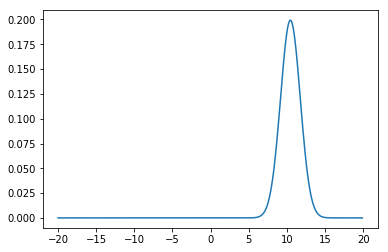

In [47]:
## Print out and display the final, resulting Gaussian 
# set the parameters equal to the output of the Kalman filter result
mu = mu
sigma2 = sig

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(gaussian_function(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)
plt.show()

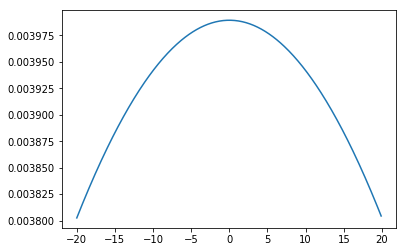

In [48]:
# display the *initial* gaussian over a range of x values
# define the parameters
mu = 0
sigma2 = 10000

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(gaussian_function(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)
plt.show()